In [ ]:
from config_parsing import parse_config
import plotly.io as pio

%load_ext autoreload
%autoreload 2

pio.renderers.default = "jupyterlab"
 
CONFIG_LOCATION = "./Docs.json"
config = parse_config(CONFIG_LOCATION)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from dataclasses import fields
from material import MaterialSpec

fields(MaterialSpec)

()

In [2]:
from material import MaterialSpec
from config_parsing import Config
from plotting.tables import recipe_summary
from plotting.sankey import plot_sankey
from plotting.graph import plot_process
from process import Process
from machine import Machine
from IPython.display import display, HTML
from igraph import Graph

def factory_plan(available_machines: list[Machine], target: MaterialSpec):
    Machine.autobind(available_machines)

    solution = Process.from_outputs(target, 
                                    available_machines
                                    )

    # TODO: color by machine or recipe type
    plot_process(solution, Graph.layout_reingold_tilford)
    plot_sankey(solution)
    display(HTML(recipe_summary(solution)))
    # total_power(solution)
    return solution

In [3]:
# total production
config = parse_config(CONFIG_LOCATION)
available_machines = [m.instance() for m in config.recipes.values()]
target_product = config.materials(iron_rod=10, iron_plate=10, reinforced_iron_plate=5, rotor=5,
                                  steel_beam=5, encased_industrial_beam=2, modular_frame=5, heavy_modular_frame=5)

# factory_plan(available_machines, target_product)

In [6]:
dir(MaterialSpec)

['__add__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [4]:
# small iron factory
target_product = MaterialSpec(iron_rod=60, iron_plate=60, reinforced_iron_plate=20)

factory_plan(target_product)

TypeError: MaterialSpec.__init__() got an unexpected keyword argument 'iron_rod'

missing: 'BP_ItemDescriptorPortableMiner_C'



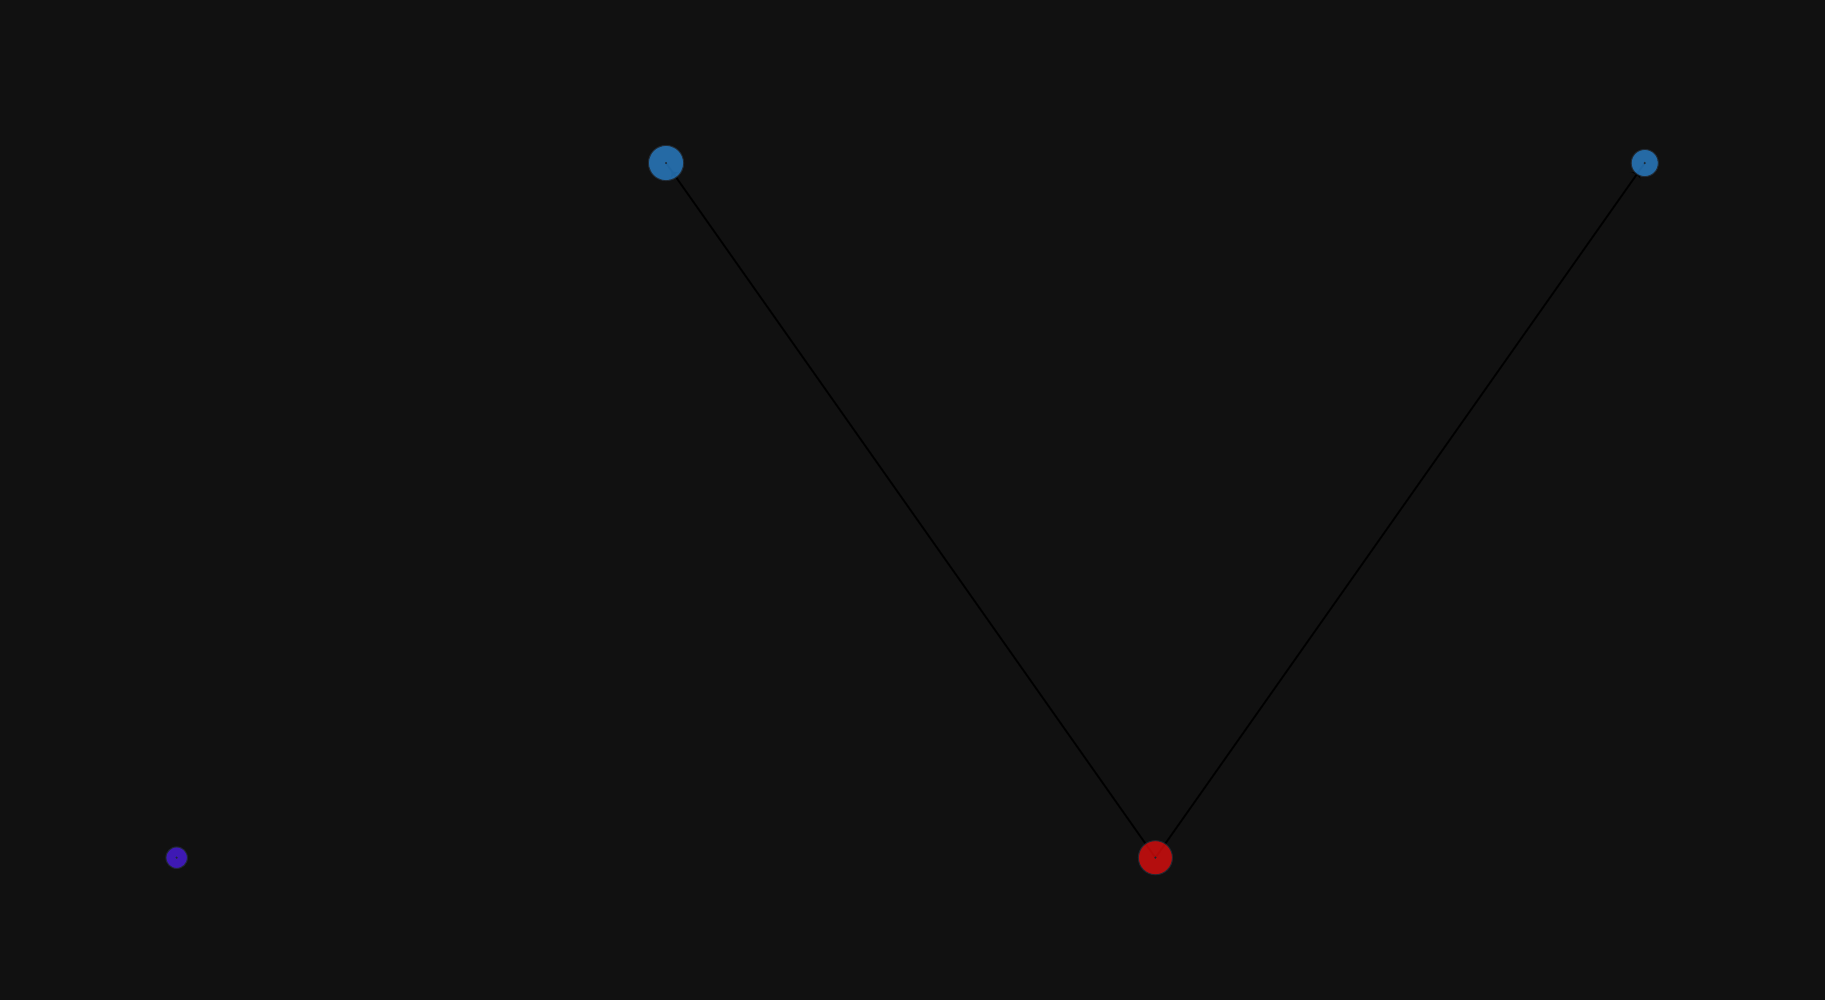

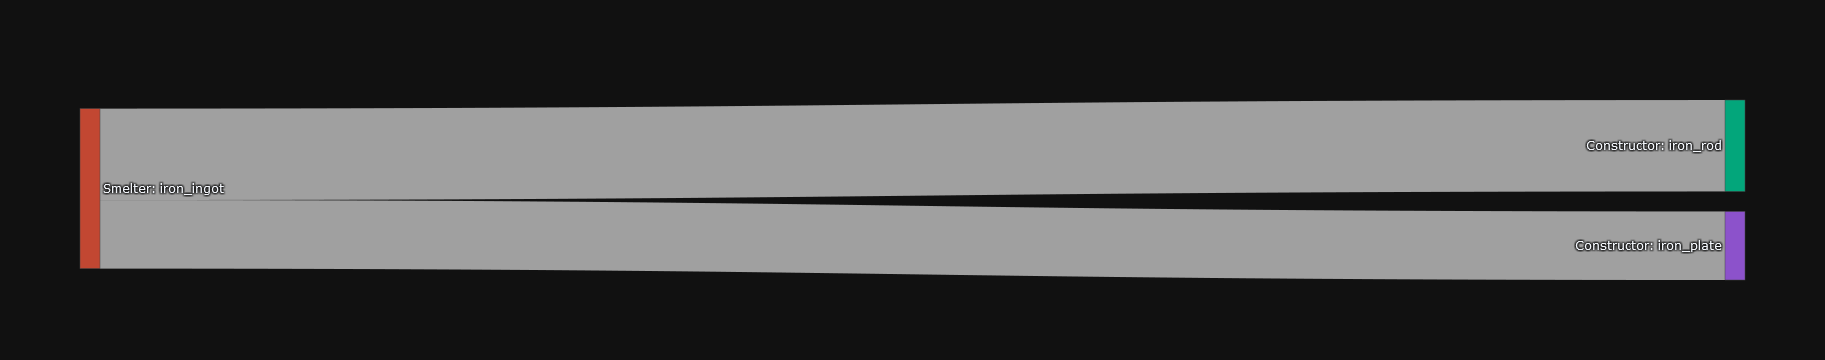

Machine Type,Count,Recipe,Ingredients,Products
Aggregator,1,input,iron_ore: 360.00,iron_ore: 360.00
Smelter,12.0,iron_ingot,iron_ore: 360.00,iron_ingot: 360.00
Constructor,13.7143,iron_rod,iron_ingot: 205.71,iron_rod: 205.71
Constructor,5.1429,iron_plate,iron_ingot: 154.29,iron_plate: 102.86


In [19]:
available_machines = make_recipes(BASE_CONFIG, machine_mapping)
available_machines = [*available_machines.core]
Machine.autobind(available_machines)

target_product = MaterialSpec(iron_plate=1, iron_rod=2)
target_available = MaterialSpec(iron_ore=360)
solution = Process.from_inputs(target_available,
                               target_product,
                               available_machines)

plot_process(solution, Graph.layout_reingold_tilford)
plot_sankey(solution)
display(HTML(recipe_summary(solution)))

In [450]:
# small steel factory

In [451]:
# big steel factory

In [1]:
from ipytree import Tree, Node
from ipywidgets import link

tree = Tree(stripes=False)
node1 = Node("node1")
node2 = Node("node2")
node3 = Node("node3")

child1 = Node("child")
child2 = Node("child")
child3 = Node("child")

link((child1, "selected"), (child2, "selected"))
link((child2, "selected"), (child3, "selected"))


tree.add_node(node1)
tree.add_node(node2)
tree.add_node(node3)

node1.add_node(child1)
node2.add_node(child2)
node3.add_node(child3)

tree

Tree(nodes=(Node(name='node1', nodes=(Node(name='child'),)), Node(name='node2', nodes=(Node(name='child'),)), …

In [3]:
from categorized_collection import CategorizedCollection

test = CategorizedCollection()
test["a"] = "a"
test["b"] = "b"
test["c"] = "c"

test.set_tag("a", 1)
test.set_tag("b", 1)
test.set_tag("b", 2)
test.set_tag("c", 2)

In [4]:
tree = Tree(stripes=False)
nodes = {}
recipes = {}
calls = []

def update_recipes(*args, **kwargs):
    calls.append((args, kwargs))

for tag in test.tags:
    tag_node = Node(str(tag))
    tree.add_node(tag_node)
    for label in test.tag(tag).keys():
        node = nodes.setdefault(label, Node(str(label)))
        # node = nodes.get(label, Node(str(label)))
        tag_node.add_node(node)
    
tree.observe(update_recipes, names="selected_nodes")
tree

Tree(nodes=(Node(name='1', nodes=(Node(name='b'), Node(name='a'))), Node(name='2', nodes=(Node(name='c'), Node…

In [45]:
from plotting.widgets import material_widget, recipe_widget, optimize_outputs_widget
from ipywidgets.widgets import Accordion

In [47]:
from IPython.display import display

a = None

def callback(process):
    global a
    a = process
    

m_w, materials = material_widget(config.materials)
r_w, recipes = recipe_widget(config.recipes)
o_b = optimize_outputs_widget(callback, materials, recipes)

accordion = Accordion(children=[m_w, r_w, o_b])
accordion.set_title(0, 'Materials')
accordion.set_title(1, 'Recipes')
accordion.set_title(2, 'Run')
accordion

Accordion(children=(interactive(children=(IntSlider(value=0, description='uranium_waste', max=1), IntSlider(va…

In [34]:
a